In [9]:
# id first training
# caption results from the first training
from fastai.vision.all import *


In [11]:
path = untar_data(URLs.PETS)/'images'

In [12]:
def is_cat(x): return x[0].isupper()

In [13]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

In [14]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1) # 1 epoch

c:\Users\Raj\repos\fastai-dl\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Raj\repos\fastai-dl\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.160521,0.019121,0.006766,05:03


epoch,train_loss,valid_loss,error_rate,time
0,0.060104,0.013912,0.004060,06:52


<Axes: >

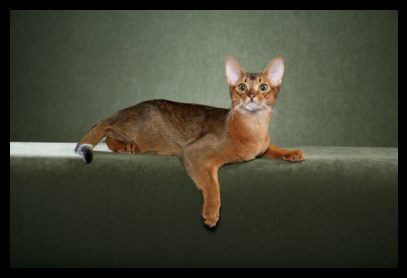

In [6]:
fnames = get_image_files(path)
img = PILImage.create(fnames[0])

img.show()

<Axes: >

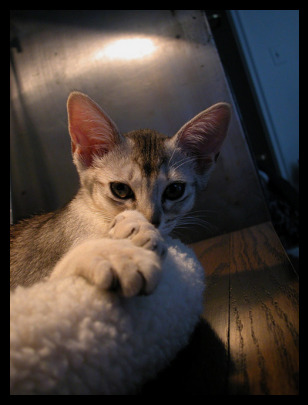

In [7]:
img1 = PILImage.create(fnames[1])
img1.show()

In [8]:
img1 = PILImage.create(fnames[1]).to_thumb(512)
img1.show()

In [1]:
# upload my own image
import ipywidgets as widgets
uploader = widgets.FileUpload(
    accept='.png,.jpg,.jpeg',
    multiple=False  # True to accept multiple files upload else False
    )
uploader

FileUpload(value=(), accept='.png,.jpg,.jpeg', description='Upload')

In [2]:
display(uploader)

FileUpload(value=(), accept='.png,.jpg,.jpeg', description='Upload')

In [15]:
# pass the uploaded image to the model for prediction
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

AttributeError: 'FileUpload' object has no attribute 'data'

<Axes: >

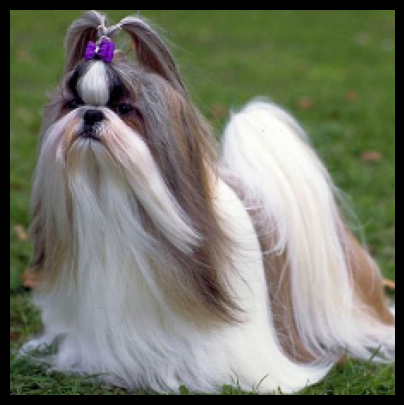

In [16]:
# ipywidgets is not working in vscode. So..
img_path = Path('C:/Users/Raj/Pictures/shih-tzu.png')
img = PILImage.create(img_path)
img.show()

In [17]:
# pass the uploaded image to the model for prediction
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability it's a cat: 0.000750
